In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

# Programa 1

In [21]:
def Resumen(x_test, y_test,regresion):
    prediction = regresion.predict(x_test)
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    return mse, r2

def Grafica_Regresion(x_test,y_test,y_pred,title):
    plt.scatter(x_test, y_test, color='blue',label='Datos de prueba')
    plt.plot(x_test, y_pred, color='red', label='Predicción')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.show()

def RegresionOLS(x_train,y_train,x_test,y_test):
    regresionL = LinearRegression()
    regresionL.fit(x_train.reshape(-1,1), y_train)
    regresionL_OLSmse, regresionL_OLSr2 = Resumen(x_test.reshape(-1,1), y_test,regresionL)
    print(f'Regresion Lineal con OLS: \t mse={regresionL_OLSmse} \t r2={regresionL_OLSr2}')
    y_pred = regresionL.predict(x_test.reshape(-1,1))
    Grafica_Regresion(x_test,y_test,y_pred,'Regresion Lineal con OLS')

    for grado in range(2,4):
        regresionL_OLSpoly = make_pipeline(PolynomialFeatures(degree=grado), LinearRegression())
        regresionL_OLSpoly.fit(x_train.reshape(-1,1), y_train)
        regresionL_OLSpolymse, regresionL_OLSpolyr2 = Resumen(x_test.reshape(-1,1), y_test,regresionL_OLSpoly)
        print(f'Regresion Polinomial con OLS grado {grado}: \t mse={regresionL_OLSpolymse} \t r2={regresionL_OLSpolyr2}')
        indices = np.argsort(x_test)
        y_pred = regresionL_OLSpoly.predict(x_test[indices].reshape(-1,1))
        Grafica_Regresion(x_test[indices],y_test[indices],y_pred,f'Regresion Polinomial con OLS de grado {grado}')

def RegresionSGD(x_train,y_train,x_test,y_test,alpha,iterations):
    regresionSGD = SGDRegressor(learning_rate='constant',eta0=alpha, max_iter=iterations)
    regresionSGD.fit(x_train.reshape(-1,1), y_train)
    regresionSGDmse, regresionSGDr2 = Resumen(x_test.reshape(-1,1), y_test,regresionSGD)
    print(f'Regresion Lineal con SGD: \t mse={regresionSGDmse} \t r2={regresionSGDr2}')
    y_pred = regresionSGD.predict(x_test.reshape(-1,1))
    Grafica_Regresion(x_test,y_test,y_pred,'Regresion Lineal con SGD')

    for grado in range(2,4):
        regresionSGDpoly = make_pipeline(PolynomialFeatures(degree=grado), SGDRegressor(learning_rate='constant',eta0=alpha, max_iter=iterations))
        regresionSGDpoly.fit(x_train.reshape(-1,1), y_train)
        regresionSGDpolymse, regresionSGDpolyr2 = Resumen(x_test.reshape(-1,1), y_test,regresionSGDpoly)
        print(f'Regresion Polinomial con SGD grado {grado}: \t mse={regresionSGDpolymse} \t r2={regresionSGDpolyr2}')
        indices = np.argsort(x_test)
        y_pred = regresionSGDpoly.predict(x_test[indices].reshape(-1,1))
        Grafica_Regresion(x_test[indices],y_test[indices],y_pred,f'Regresion Polinomial con SGD de grado {grado}')

In [22]:
data = pd.read_csv('datos.csv')
data

,x,y
0,-3.292157,-44.608971
1,-0.936214,0.623178
2,-3.602674,-58.873048
3,-0.850265,-6.057589
4,2.309657,-3.967128
...,...,...
95,5.878571,36.139165
96,2.117848,-8.607422
97,0.430170,-3.414761
98,-0.315372,-1.059461


In [23]:
x = data['x'].values
y = data['y'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)    

Regresion Lineal con OLS: 	 mse=296.0945867766399 	 r2=0.7198048208163852


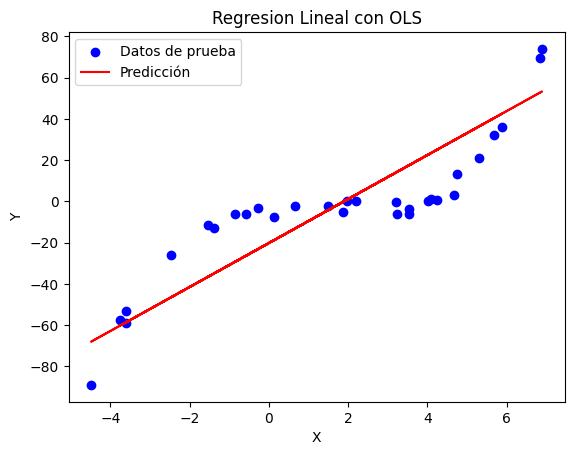

Regresion Polinomial con OLS grado 2: 	 mse=352.43738401011177 	 r2=0.6664874659184123


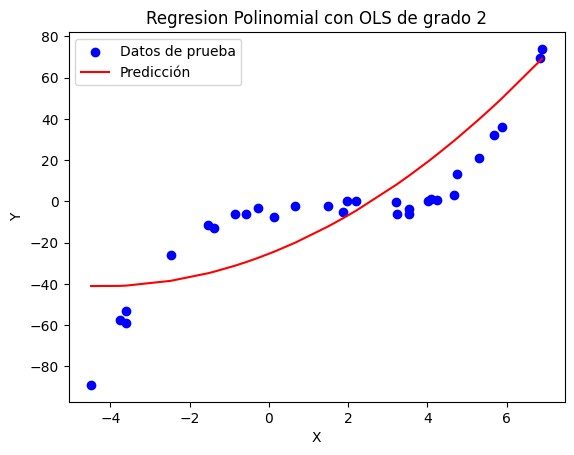

Regresion Polinomial con OLS grado 3: 	 mse=8.487854131822635 	 r2=0.9919679186464004


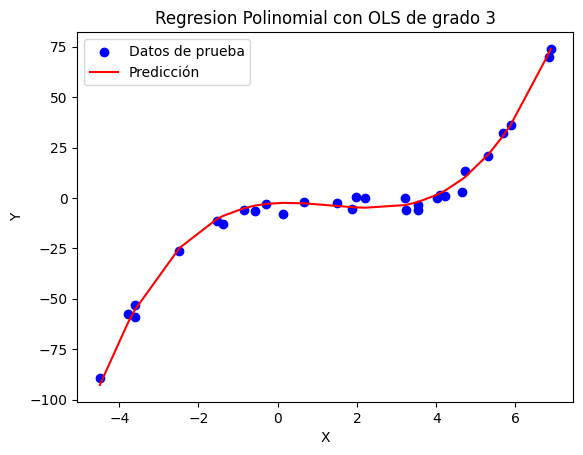

In [24]:
RegresionOLS(x_train,y_train,x_test,y_test)

Regresion Lineal con SGD: 	 mse=554.9632215403115 	 r2=0.4748366696176577


c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


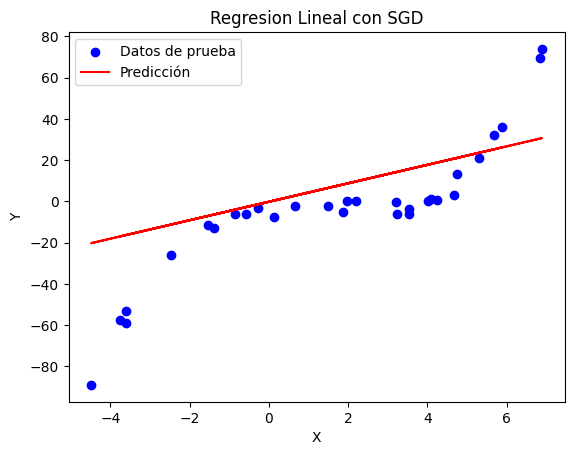

c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Regresion Polinomial con SGD grado 2: 	 mse=872.4391519498926 	 r2=0.17440826200647408


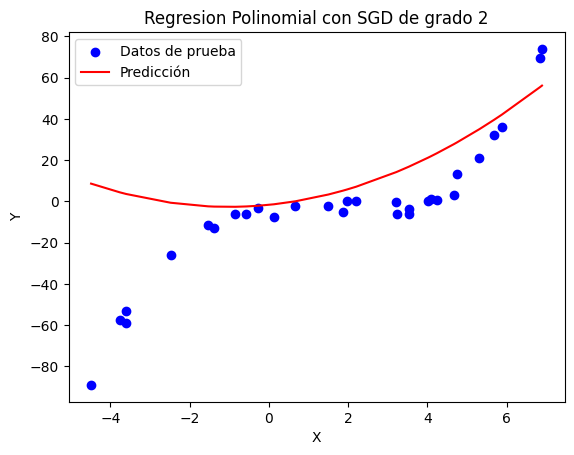

Regresion Polinomial con SGD grado 3: 	 mse=16.02541924211914 	 r2=0.9848350985915681


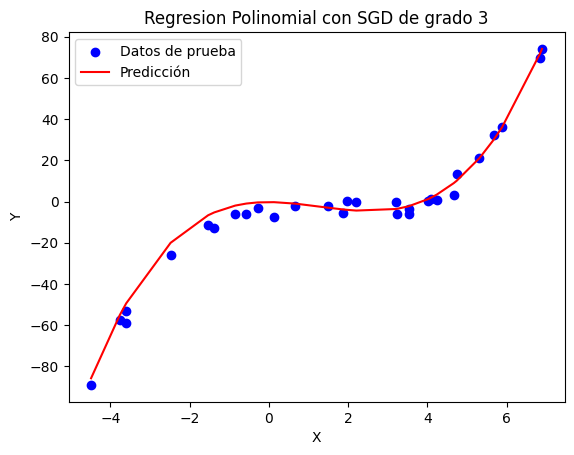

In [25]:
RegresionSGD(x_train,y_train,x_test,y_test,0.0000001,10000)

# Programa 2

In [26]:
data = pd.read_csv('cal_housing.csv')
data

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [27]:
x = data.drop('medianHouseValue', axis=1).values
y = data['medianHouseValue'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)


In [28]:
def TransformaryEscalar(x,grado,escalador):
    x_transformado = x.copy()
    if grado > 1:
        poly = PolynomialFeatures(degree=grado)
        x_transformado = poly.fit_transform(x_transformado)
        if escalador:
            x_transformado = escalador.fit_transform(x_transformado)
    else:
        x_transformado = escalador.fit_transform(x_transformado)
    return x_transformado


In [29]:
mses = []
r2s = []
regresiones = ['Lineal','Polinomial de grado 2', 'Polinomial de grado 2 con escalamiento Robusto','Polinomial con escalamiento robusto','Polinomial de grado 3','Polinomial de grado 3 con escalamiento estándar','Polinomial de grado 3 con escalamiento robusto']

In [30]:
def Regresiones(x_train, x_test, y_train, y_test):
    grados = [2,3]
    escaladores = [None,StandardScaler(), RobustScaler()]
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mses.append(mse)
    r2s.append(r2)

    for grado in grados:
        for escalador in escaladores:
            x_train_poly = TransformaryEscalar(x_train,grado,escalador)
            x_test_poly = TransformaryEscalar(x_test,grado,escalador)
            model = LinearRegression()
            model.fit(x_train_poly, y_train)
            y_pred = model.predict(x_test_poly)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            mses.append(mse)
            r2s.append(r2)

    return mses, r2s

In [31]:
Regresiones(x_train, x_test, y_train, y_test)


([4853781771.947968,
  4076152908.9499826,
  4111950340.7116957,
  5047513814.43681,
  4138351374.7179623,
  8862039818.063568,
  8684145319420.614],
 [0.6277645980446449,
  0.6874007757696214,
  0.6846554790037468,
  0.6129073324946686,
  0.6826307898094043,
  0.3203722151485685,
  -664.9850968775487])

In [32]:
final = pd.DataFrame({'Regresiones':regresiones, 'MSE':mses, 'R2':r2s})
final

,Regresiones,MSE,R2
0,Lineal,4.853782e+09,0.627765
1,Polinomial de grado 2,4.076153e+09,0.687401
2,Polinomial de grado 2 con escalamiento Robusto,4.111950e+09,0.684655
3,Polinomial con escalamiento robusto,5.047514e+09,0.612907
4,Polinomial de grado 3,4.138351e+09,0.682631
5,Polinomial de grado 3 con escalamiento estándar,8.862040e+09,0.320372
6,Polinomial de grado 3 con escalamiento robusto,8.684145e+12,-664.985097
